In [1]:
##importing librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##loading dataset and displaying first few rows
df=pd.read_csv("online_retail_10_11.csv",encoding="ISO-8859-1",error_bad_lines=False)
##display first few rows
df.head()

C:\Users\91876\AppData\Local\Temp\ipykernel_14456\418103949.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("online_retail_10_11.csv",encoding="ISO-8859-1",error_bad_lines=False)


,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print(df.columns)

Index(['ï»¿InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [4]:
df.rename(columns={"ï»¿InvoiceNo":"InvoiceNo"},inplace=True)
##verifying column name again
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [5]:
##checking for the missing values if any
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
##we came to know that description and CustomerId has missing rows
##removing rows with missing description and CustomerID
df_cleaned=df.dropna(subset=["Description","CustomerID"])

In [7]:
##verify missing values again
print(df_cleaned.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [8]:
##converting invoice date to datetime format
df_cleaned["InvoiceDate"]=pd.to_datetime(df_cleaned["InvoiceDate"])

C:\Users\91876\AppData\Local\Temp\ipykernel_14456\3858925402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["InvoiceDate"]=pd.to_datetime(df_cleaned["InvoiceDate"])


In [9]:
##verifying the data type
print(df_cleaned.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [10]:
##customer id should be a whole no not a float
##convert CustomerID to integer type
df_cleaned["CustomerID"]=df_cleaned["CustomerID"].astype(int)

C:\Users\91876\AppData\Local\Temp\ipykernel_14456\1111421080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["CustomerID"]=df_cleaned["CustomerID"].astype(int)


In [11]:
##verify the data type again
print(df_cleaned.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object


In [12]:
##now lets check for duplicate rows
##check for duplicate
print("Duplicate Rows:",df_cleaned.duplicated().sum())



Duplicate Rows: 5225


In [13]:
##remove rows where quantity or unitprice is less than or equal to zero
df_cleaned=df_cleaned[(df_cleaned["Quantity"]>0)&(df_cleaned["UnitPrice"]>0)]

In [14]:
##verify if any negative values remain
print(df_cleaned[["Quantity","UnitPrice"]].describe())

            Quantity      UnitPrice
count  397885.000000  397885.000000
mean       12.988208       3.116525
std       179.331551      22.097861
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


In [15]:
##data tells min value of both column is greater than zero(min=1.000 for quantity=0)this confirm that no negative or zero values left.

In [16]:
df_cleaned['TotalSales']=df_cleaned['Quantity']*df_cleaned['UnitPrice']
print(df_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  


In [17]:
##final dataset shape
print("Final dataset shape:",df_cleaned.shape)
##Display first 5 rows
df_cleaned.head()

Final dataset shape: (397885, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [18]:
##EDA 
##CHECK basic statistics
df_cleaned.describe(include="all")

C:\Users\91876\AppData\Local\Temp\ipykernel_14456\264589982.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cleaned.describe(include="all")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
count,397885,397885,397885,397885.000000,397885,397885.000000,397885.000000,397885,397885.000000
unique,18532,3665,3877,NaN,17282,NaN,NaN,37,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,NaN
freq,542,2035,2028,NaN,542,NaN,NaN,354321,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.988208,NaN,3.116525,15294.416882,NaN,22.396989
std,NaN,NaN,NaN,179.331551,NaN,22.097861,1713.144421,NaN,309.070653
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN,0.001000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13969.000000,NaN,4.680000


In [19]:
##top 10 most sold products
top_sold=df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_sold)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [20]:
##top 10 most profitable products
top_profitable=df_cleaned.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
print(top_profitable)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77821.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalSales, dtype: float64


Text(0.5, 1.0, 'Top 10 Most Profitable Products')

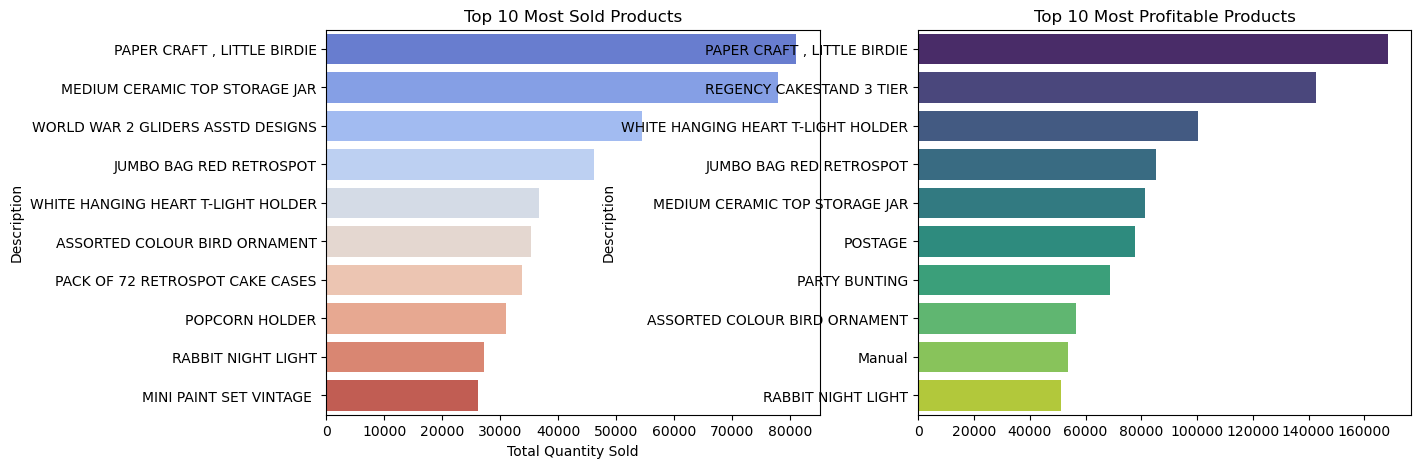

In [21]:
##plotting
fig,axes=plt.subplots(1,2,figsize=(14,5))
sns.barplot(y=top_sold.index,x=top_sold.values,ax=axes[0],palette="coolwarm")
axes[0].set_title("Top 10 Most Sold Products")
axes[0].set_xlabel("Total Quantity Sold")
sns.barplot(y=top_profitable.index,x=top_profitable.values,ax=axes[1],palette="viridis")
axes[1].set_title("Top 10 Most Profitable Products")

In [22]:
##customer behaviour analysis
##number of unique customers
num_customers=df_cleaned['CustomerID'].nunique()
print(f"Total Unique Customers:{num_customers}")

Total Unique Customers:4338


In [23]:
##most loyal Customers(top 10 by purchase count)
loyal_customers=df_cleaned['CustomerID'].value_counts().head(10)
print(loyal_customers)

17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
15311    2379
14646    2076
13089    1818
13263    1677
14298    1637
Name: CustomerID, dtype: int64


In [24]:
##top customer by total revenue
top_revenue_customers=df_cleaned.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(10)
print(top_revenue_customers)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: TotalSales, dtype: float64


In [25]:
##average order value(AOV)
aov=df_cleaned['TotalSales'].sum()/df_cleaned['InvoiceNo'].nunique()
print(f"Avergae Order Value(aov):{aov:2f}" )

Avergae Order Value(aov):480.866928


In [26]:
##time based sales analysis
df_cleaned['Year']=df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month']=df_cleaned['InvoiceDate'].dt.month
df_cleaned['DayOfWeek']=df_cleaned['InvoiceDate'].dt.day_name()

In [27]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday


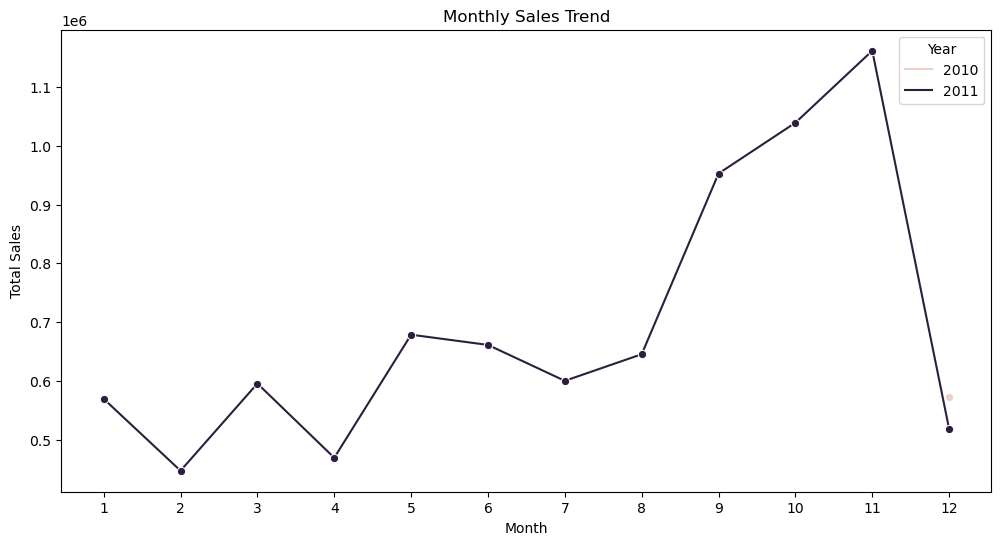

In [28]:
##monthly sales trends
monthly_sales = df_cleaned.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalSales', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.show()


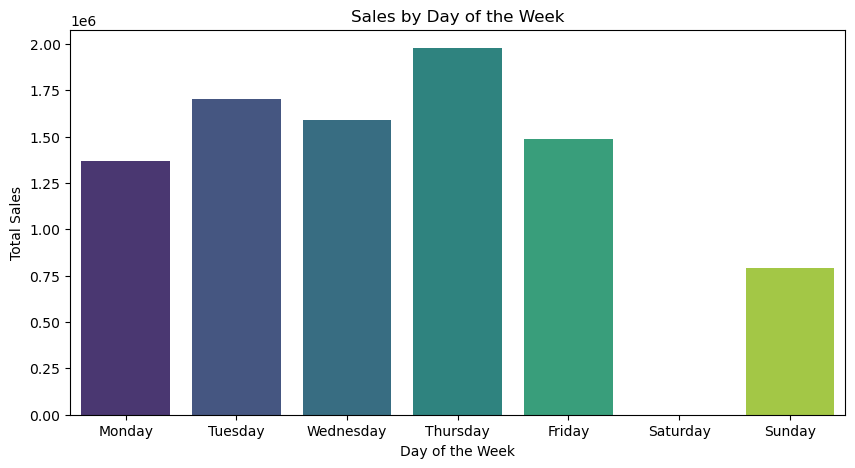

In [29]:
##sales by day of the week
weekday_sales = df_cleaned.groupby('DayOfWeek')['TotalSales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

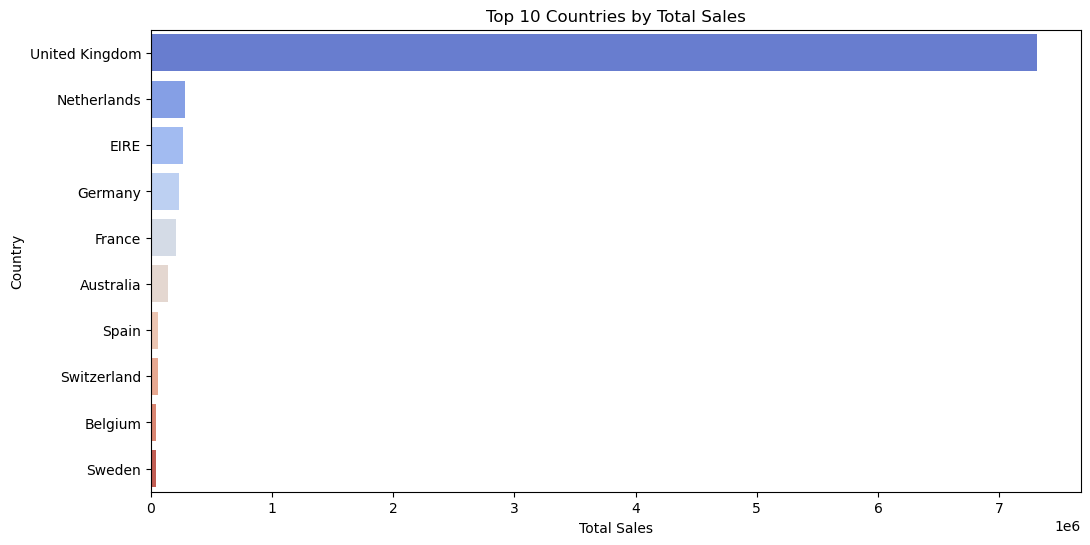

In [30]:
##geographical sales analysis
##sales by country
country_sales = df_cleaned.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=country_sales.index[:10], x=country_sales.values[:10], palette='coolwarm')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


In [31]:
import datetime

latest_date = df_cleaned['InvoiceDate'].max()
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalSales': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSales': 'Monetary'})

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


In [32]:
##assigning RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,4,6
12347,1,7,4310.00,4,4,4,12
12348,74,4,1797.24,2,3,4,9
12349,18,1,1757.55,3,1,4,8
12350,309,1,334.40,1,1,2,4


In [33]:
##customer segmentation based on RFM score
def segment_customer(score):
    if score >= 10:
        return 'Best Customers'
    elif score >= 7:
        return 'Loyal Customers'
    elif score >= 5:
        return 'Potential Customers'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)
rfm.groupby('Segment').size()



Segment
At Risk                 807
Best Customers         1268
Loyal Customers        1275
Potential Customers     988
dtype: int64

In [34]:
df_cleaned.to_csv("cleaned_retail_data.csv",index=False)

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import timedelta

# Load your cleaned retail data
df = pd.read_csv("cleaned_retail_data.csv", parse_dates=['InvoiceDate'])

# Drop missing CustomerIDs if any
df = df.dropna(subset=["CustomerID"])


# Create Snapshot date for Recency calculation
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

# RFM Table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalSales': 'sum'                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Normalize (standardize) RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

rfm['Segment'] = kmeans.fit_predict(rfm_scaled)

# Save final data with segment labels
rfm.to_csv("rfm_segmented_customers.csv", index=False)

print("✅ Segmentation complete! Saved as 'rfm_segmented_customers.csv'")


✅ Segmentation complete! Saved as 'rfm_segmented_customers.csv'
